In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Predicting Student Dropout Rates

### Load the Bankruptcy Dataset into a `DataFrame`

In [65]:
# Load the dataset
student_data_location = '/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/data/student-data.csv'
student_data_df = pd.read_csv(student_data_location)

### Display the first few rows of your `DataFrame`

In [66]:
student_data_df.failures.value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

Summary of Data Attributes:

- school - student's school (binary: "GP" or "MS")
- sex - student's sex (binary: "F" - female or "M" - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: "U" - urban or "R" - rural)
- famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- guardian - student's guardian (nominal: "mother", "father" or "other")
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
- passed - did the student pass the final exam (binary: yes or no)


## Cast `passed` to a Numerical Value

In [56]:
def binary_classification(value):
    

    return passed

In [72]:
passed = lambda x: 1 if x=='yes' else 0

In [73]:
student_passed = student_data_df['passed'].apply(passed)

In [74]:
student_passed

0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
      ..
365    1
366    1
367    0
368    1
369    1
370    0
371    1
372    1
373    0
374    1
375    1
376    1
377    1
378    1
379    1
380    1
381    0
382    1
383    0
384    0
385    1
386    0
387    0
388    0
389    0
390    0
391    1
392    0
393    1
394    0
Name: passed, dtype: int64

### Exploratory Visualization

Use `seaborn` to find salient features.

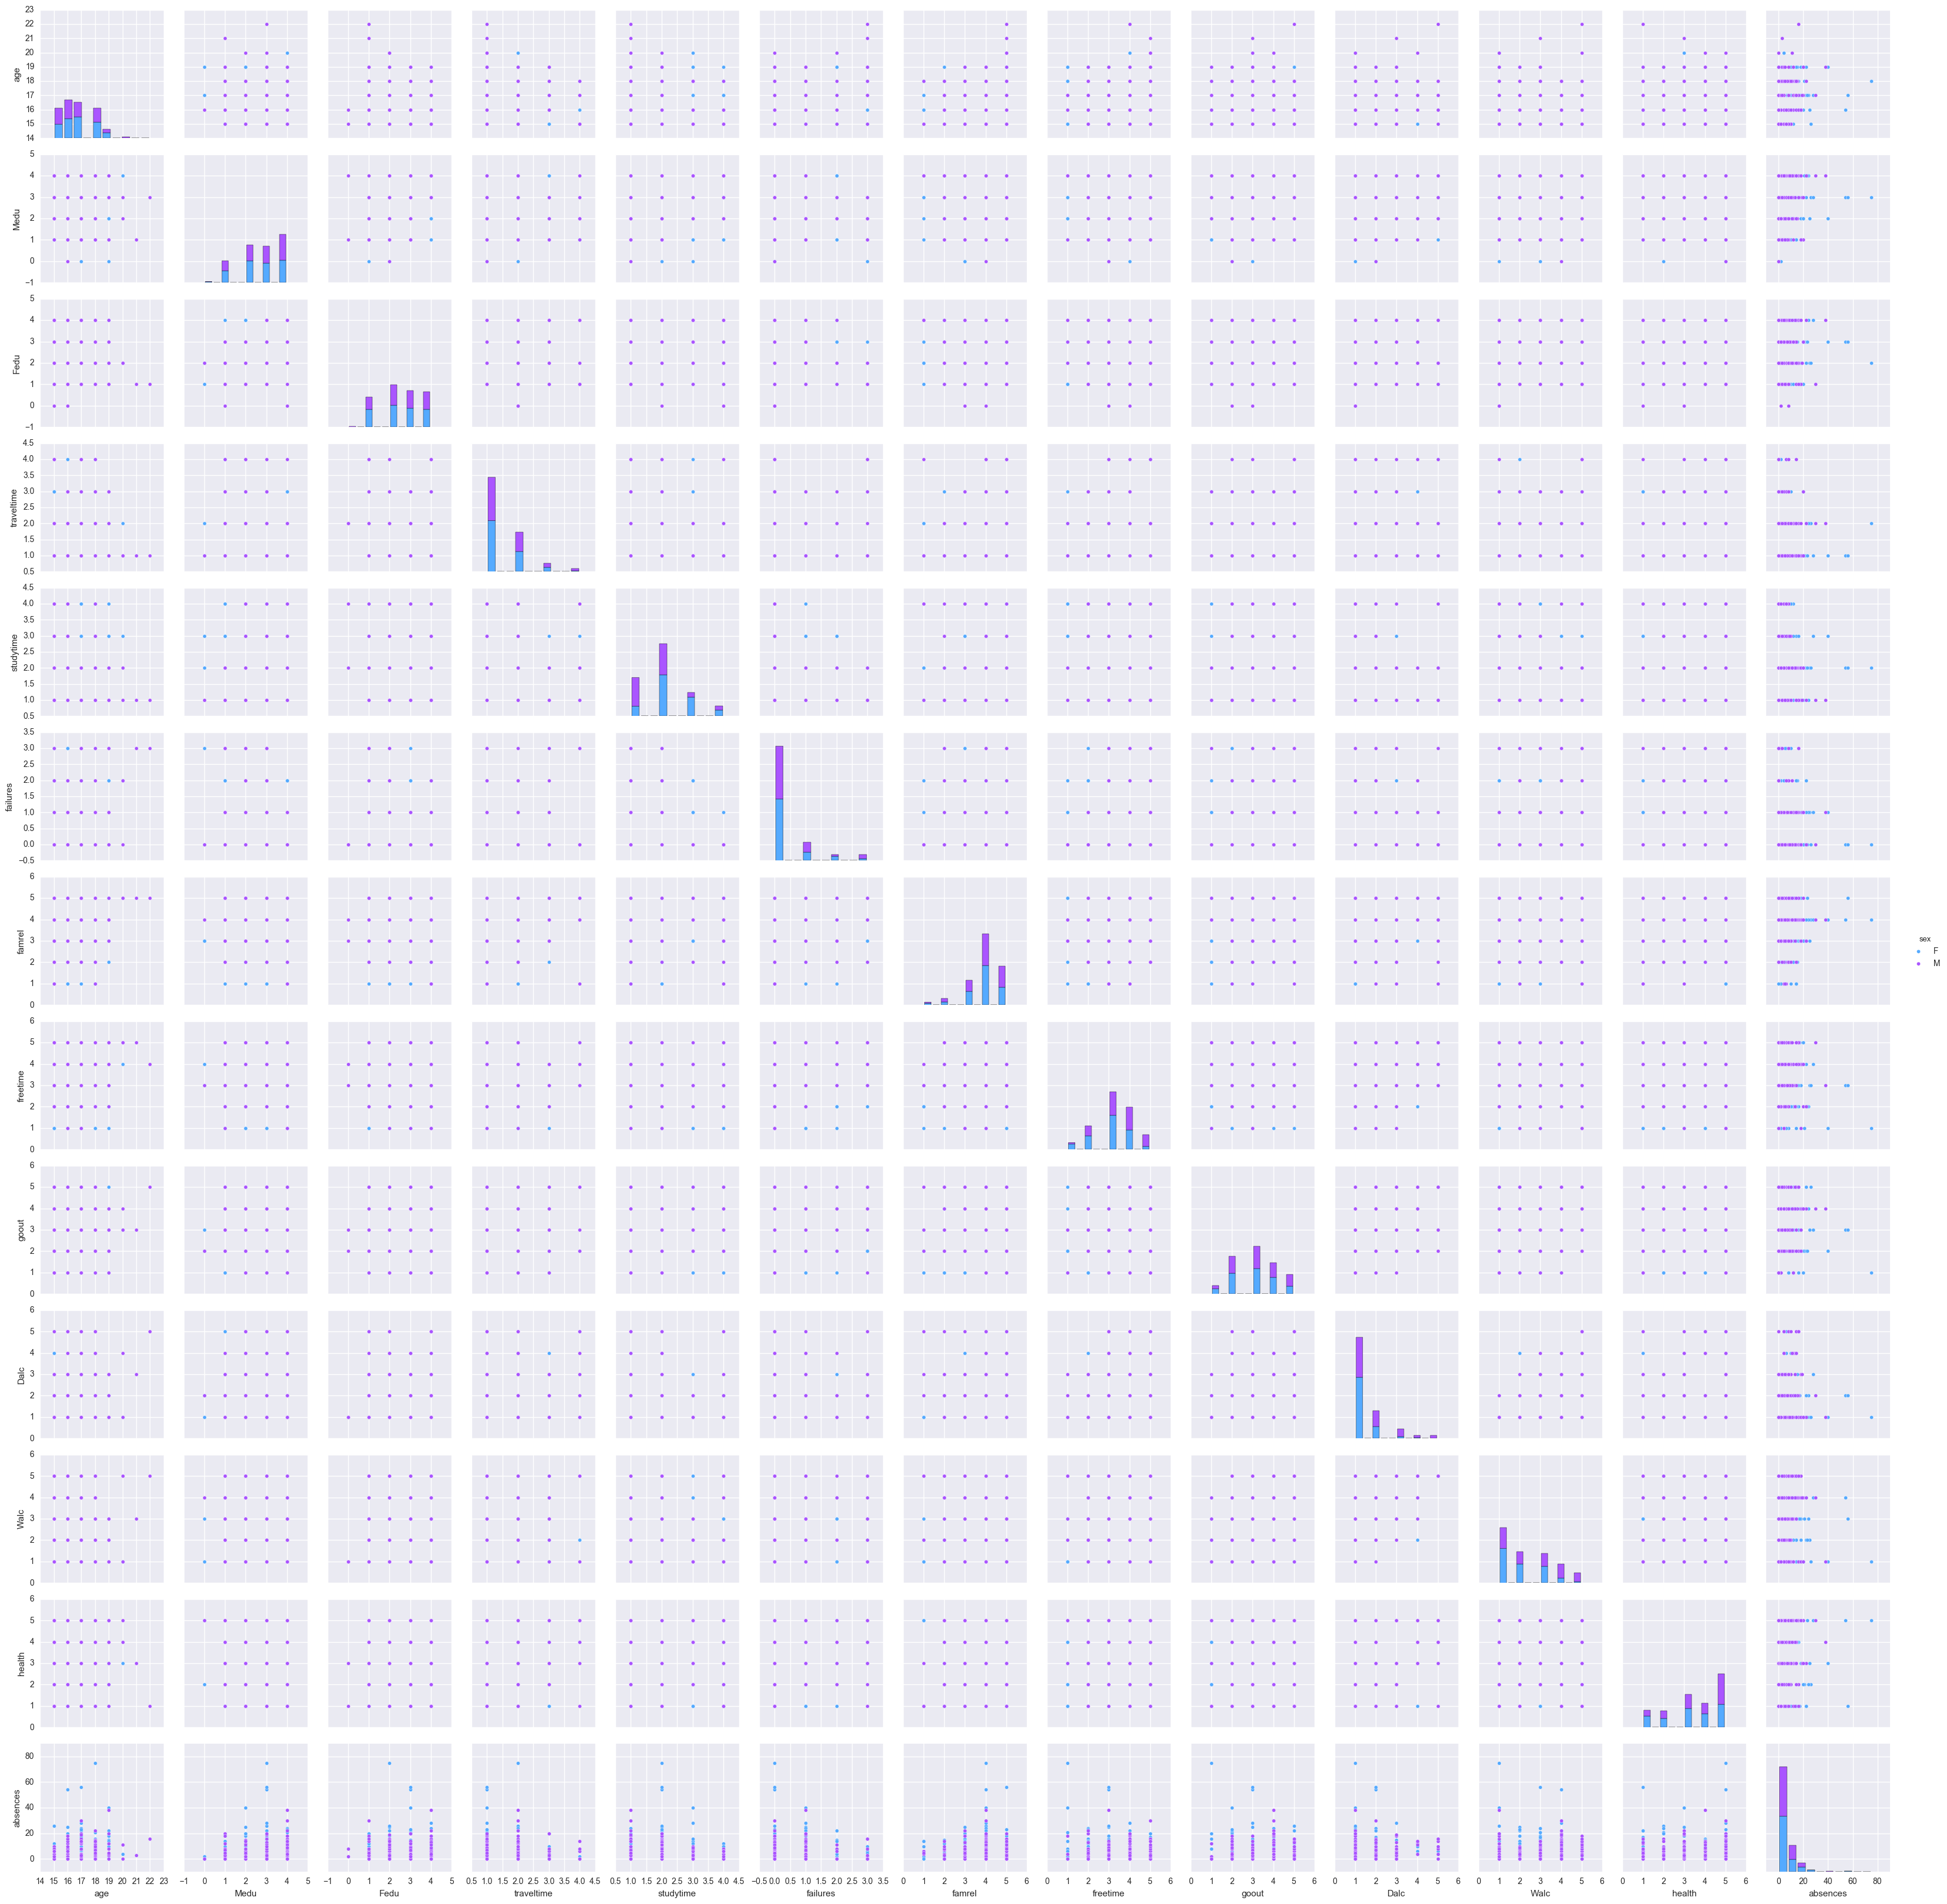

In [29]:
sns.pairplot(student_data_df, hue='sex', palette='cool')

### Prepare Feature `DataFrame` and Target `Series`

Store the Class column as a `Series` called `student_target`.

Prepare a dataframe of the columns you have found to be salient called `student_features`.

In [77]:
student_target = student_passed
student_feature = student_data_df.drop('passed', axis=1)
failures = student_data_df[student_data_df['failures'] >=3]

In [30]:
failures.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
18,GP,M,17,U,GT3,T,3,2,services,services,...,yes,no,5,5,5,2,4,5,16,no
78,GP,M,17,U,GT3,T,2,1,other,other,...,yes,no,4,5,1,1,1,3,2,yes
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,no,3,4,2,1,1,5,2,no
144,GP,M,17,U,GT3,T,2,1,other,other,...,yes,no,5,4,5,1,2,5,0,no


## Metric and Benchmark

### Prepare a Metric to Measure the Performance of our Predictions

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of student. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function. 



In [78]:
student_target[:5]

0    0
1    0
2    1
3    1
4    1
Name: passed, dtype: int64

In [48]:
def accuracy_score(actual, predicted):
    
    """ 
    A function that compares a set of actual outcomes to predicted outcomes 
    and returns a proportion from 0 to 1 
    """
    
    return np.array(actual == predicted).mean()

#### Test the 'accuracy_score' function

In [80]:
predictions = pd.Series(np.ones(5, dtype = int))

print """
    Our metric predicts {}.
      """.format(accuracy_score(predictions, student_target[:5]))



    Our metric predicts 0.6.
      


In [83]:
student_feature.shape

(395, 30)

In [86]:
def model_0_no_grads(student_feature):
    """ Returns a vector of zeros the same length as the feature dataframe."""

    n = student_feature.shape[0]
    return pd.Series(np.zeros(n))

In [88]:
model_0_predictions = model_0_no_grads(student_feature)

In [98]:
print accuracy_score(student_target, model_1_predictions)

0.255696202532


In [123]:
print accuracy_score(student_target, model_2_predictions)

0.524050632911


In [130]:
print accuracy_score(student_target, model_3_predictions)

0.425316455696


In [137]:
print accuracy_score(student_target, model_4_predictions)

0.437974683544


In [93]:
absent = student_feature['absences']

In [97]:
def model_1_alcohol(student_feature):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    #absent = student_feature['absences'] == 'female'
    weekend_alcohol = student_feature['Walc']
    daily_alcohol = student_feature['Dalc']
    return weekend_alcohol | daily_alcohol

# Make the predictions
model_1_predictions = model_1_alcohol(student_feature)

In [108]:
def model_2_sex(student_feature):
    """ Model with one feature: 
            - Predict a student failure if they are female. """
    
    sex = student_feature['sex'] == 'M'
    return sex

# Make the predictions
model_2_predictions = model_2_sex(student_feature)

In [119]:
def model_3_travel_over_hour(student_feature):
    """ Model with one feature: 
            - Predict a student failure if they are over an hour away fom school. """
    
    travel = student_feature['traveltime'] > 1
    return travel

# Make the predictions
model_3_predictions = model_3_travel_over_hour(student_feature)

In [136]:
def model_4_travel_failures(student_feature):
    """ Model with one feature: 
            - Predict a student failure if they are over an hour away fom school. """
    
    travel = student_feature['traveltime'] > 1
    failures = student_feature['failures'] > 3
    family = student_feature['famrel'] < 3
    return travel | failures | family

# Make the predictions
model_4_predictions = model_4_travel_failures(student_feature)

### What is the actual Dropout Rate?

In [111]:
print "The actual dropout rate is {}.".format(student_target.mean())

The actual dropout rate is 0.670886075949.


## How well can you Predict the Dropout Rate?

In [138]:
pwd

u'/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/curriculum/week-03-holiday'